# Ornstein-Uhlenbeck Process

An Ornstein-Uhlenbeck process is a mean-reverting Stochastic Differential Equation described by the equation

$dX_t = \kappa(\theta - X_t)dt + \sigma dW_t$

with 
$X(0) = X_0$

where:

$W_t$ is a standard Brownian motion on $ t \in [0,\infty)$

$\kappa \ge 0$ is the rate of mean reversion

$\theta$: long term mean of the process 

$\sigma \ge 0 $: volatility

## Analytic Derivations

The analytic solution is as follows:

Let $Y_t = X_t - \theta$, then $dY_t = -\kappa Y_t dt + \sigma dW_t$

If $Z_t = e^{\kappa t} Y_t$, by Ito's Lemma:

$dZ_t = \kappa e^{\kappa t}Y_t dt + e^{\kappa t}dY_t = \sigma e^{\kappa t} dW_t $

Therefore, by integrating: $Z_t = Z_s + \sigma \int_{s}^{t} e^{\kappa u} dW_u$

$Y_t = e^{- \kappa t} Z_t = e^{-\kappa (t-s)} Y_s + \sigma \int_{s}^{t} e^{-\kappa (t - u)} dW_u$ 

$X_t = Y_t + \theta = \theta + e^{-\kappa (t-s)} (X_s - \theta) + \sigma \int_{s}^{t} e^{-\kappa (t - u)} dW_u$


If $X(0) = X_0$, then 

$X_t = e^{-\kappa t}X_0 + \theta(1 - e^{-\kappa t}) + \sigma \int_{0}^{t} e^{-\kappa (t - u)} dW_u$


Since the mean of the stochastic integral is 0,

$\mathbb{E}(X_t) = e^{-\kappa t}X_0 + \theta(1 - e^{-\kappa t}) $

$var(X_t) = \mathbb{E}[(X_t - \mathbb{E}(X_t))^2]$

$ = \mathbb{E}[(\sigma^2 \int_{0}^{t} e^{-\kappa (t - u)} dW_u)^2]$ 

Now, according to Ito's isometry: 

$\mathbb{E}[(\int_{0}^{t} X_t dW_t)^2] = \mathbb{E}[\int_{0}^{t} X_T^2 dt]$

Therefore, $var(X_t) = \sigma^2 \mathbb{E}[(\int_{0}^{t}e^{- 2 \kappa (t-u)} du]  = \frac{\sigma^2}{2 \kappa} (1 - e^{-2 \kappa t })$

After simulating some sample pathes, we would also verify these two results:

$\mathbb{E}(X_t) = e^{-\kappa t}X_0 + \theta(1 - e^{-\kappa t}) $


$var(X_t) = \frac{\sigma^2}{2 \kappa} (1 - e^{-2 \kappa t })$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Parameters

In [2]:
kappa = 0.7
theta = -2.0
sigma = 0.6

t_start = 0.0
t_end = 10.0

In [34]:
y_0 = 15.0

num_iterations = 10000

N = 10000  #Compute in 10000 grid points

dt = (t_end - t_start)/N

In [35]:
time_array = np.arange(t_start, t_end, dt)  #create a time array 

#the array of brownian increments
increment_array = sigma*np.random.normal(0,np.sqrt(dt),(N, num_iterations))

#create a 2D array of dimension (time steps x iterations)
solution = np.zeros_like(increment_array)

solution[0] = y_0

#generate the solution using Euler-Maruyama method

for t in range(1, N):
    solution[t] = solution[t-1] + kappa*(theta - solution[t-1])*dt + increment_array[t]

In [36]:
### Plot some sample paths and visually compare with the mean

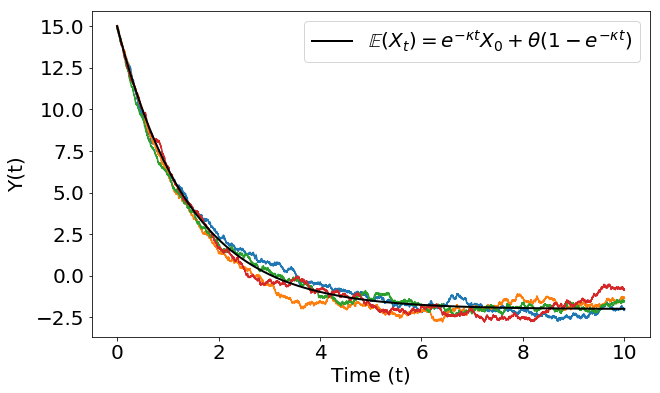

In [37]:
plt.figure(figsize=(10,6))
plt.plot(time_array, solution[:,0:4])
plt.plot(time_array, 
         y_0*np.exp(-kappa*time_array) + theta*(1.0 - np.exp(-kappa*time_array)), 
         label='$\mathbb{E}(X_t) = e^{-\kappa t}X_0 + \\theta(1 - e^{-\kappa t})$', color = 'k', linewidth=2.0) 
plt.tick_params(labelsize = 20)
plt.xlabel('Time (t)', size = 20)
plt.ylabel('Y(t)', size = 20, labelpad = 10)
plt.legend(fontsize=20)



So visually things do look allright and the paths look like they are oscillating about the mean. In the next section we will look at the time dependence of the mean and the variance more rigorously.

According to the theory:

$\mathbb{E}(X_t) = e^{-\kappa t}X_0 + \theta(1 - e^{-\kappa t}) $

$var(X_t) = \frac{\sigma^2}{2 \kappa} (1 - e^{-2 \kappa t })$

So we would check if these relations hold true. We have simulated 1000 iterations here. We can always simulate a higher number of runs but we do want the fluctuations to be visible.


In [38]:
solution_mean = np.mean(solution,axis=1)

solution_var = np.var(solution,axis=1)

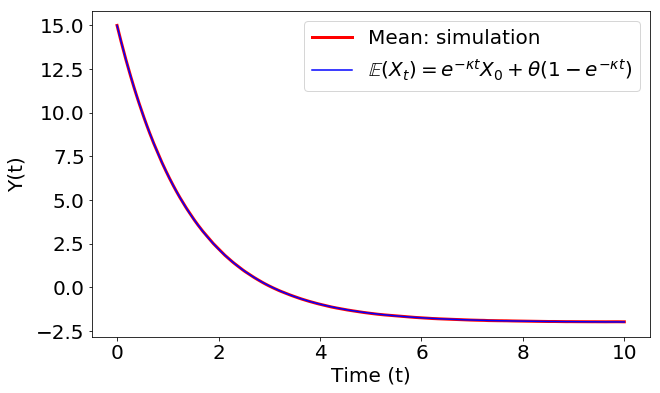

In [39]:
plt.figure(figsize=(10,6))
plt.plot(time_array, solution_mean, 'r-', label = 'Mean: simulation', linewidth = 3.0)
plt.plot(time_array, 
         y_0*np.exp(-kappa*time_array) + theta*(1.0 - np.exp(-kappa*time_array)), 
         label='$\mathbb{E}(X_t) = e^{-\kappa t}X_0 + \\theta(1 - e^{-\kappa t})$', color = 'b') 
plt.tick_params(labelsize = 20)
plt.xlabel('Time (t)', size = 20)
plt.ylabel('Y(t)', size = 20, labelpad = 10)
plt.legend(fontsize=20)

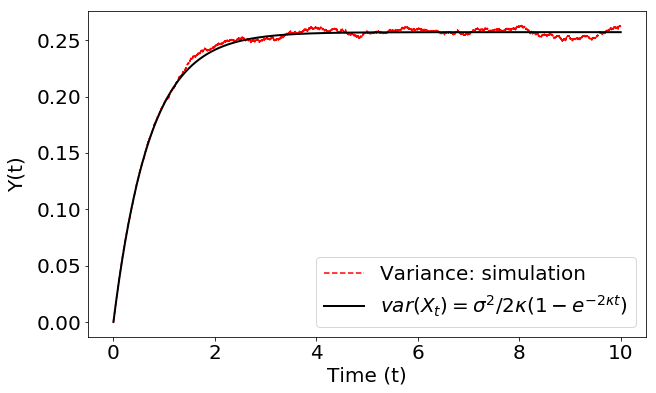

In [40]:
plt.figure(figsize=(10,6))
plt.plot(time_array, solution_var, 'r--', label = 'Variance: simulation')
plt.plot(time_array, 
         (sigma*sigma*(1.0 - np.exp(-2.0*kappa*time_array)))/(2.0*kappa), 
         label='$var(X_t) = \sigma^2/2 \kappa (1 - e^{-2 \kappa t})$', color = 'k', linewidth=2.0) 
plt.tick_params(labelsize = 20)
plt.xlabel('Time (t)', size = 20)
plt.ylabel('Y(t)', size = 20, labelpad = 10)
plt.legend(fontsize=20)

The average plots coincide exactly and the simulation variances fluctuates about the analytical value.